In [140]:
# single depth tide filters

import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sig
%matplotlib notebook

In [141]:
# Axis January and February

with xr.open_dataset('../Nov11/AxisJanFeb2018.nc') as ds:
    print(ds)

<xarray.Dataset>
Dimensions:    (depth: 80, latitude: 1, longitude: 1, time: 1404)
Coordinates:
  * time       (time) datetime64[ns] 2018-01-01T00:30:00.000003328 ... 2018-02-28T11:29:59.999996672
  * depth      (depth) float32 968.2709 960.2709 ... 344.27084 336.27084
  * latitude   (latitude) float32 48.3166
  * longitude  (longitude) float32 -126.0508
Data variables:
    u          (time, depth) float32 ...
    v          (time, depth) float32 ...
    w          (time, depth) float32 ...
    temp       (time) float32 ...
Attributes:
    Conventions:                             CF-1.6
    title:                                   Ocean Networks Canada RDI ADCP Data
    institution:                             Ocean Networks Canada
    source:                                  Fixed-position Teledyne-RDI ADCP...
    history:                                 data extracted from raw output, ...
    references:                              http://www.oceannetworks.ca/
    CREATION_DATE:    

In [143]:
# find specific depth (700 m)

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx     # returns index of nearest value

array = ds.depth
value = 700      # meters

print("Index:", find_nearest(array, value))
print("Value:", abs(array[find_nearest(array, value)]))

Index: 34
Value: <xarray.DataArray 'depth' ()>
array(696.2709, dtype=float32)
Coordinates:
    depth    float32 696.2709


In [144]:
# single depth (700 m) - remove NaN from time series, if present
# should linear interpolate, going forward

with xr.open_dataset('../Nov11/AxisJanFeb2018.nc') as ds:
    
    u700 = np.array(ds.u[:,34])
    v700 = np.array(ds.v[:,34])
    w700 = np.array(ds.w[:,34])
    
    inds_u700 = np.where(np.isnan(u700))   
    u700_mean = np.nanmean(u700)           
    u700[inds_u700] = u700_mean            # remove NaN values
    
    inds_v700 = np.where(np.isnan(v700))   
    v700_mean = np.nanmean(v700)           
    v700[inds_v700] = v700_mean            # remove NaN values
    
    inds_w700 = np.where(np.isnan(w700))   
    w700_mean = np.nanmean(w700)           
    w700[inds_w700] = w700_mean            # remove NaN values

<IPython.core.display.Javascript object>


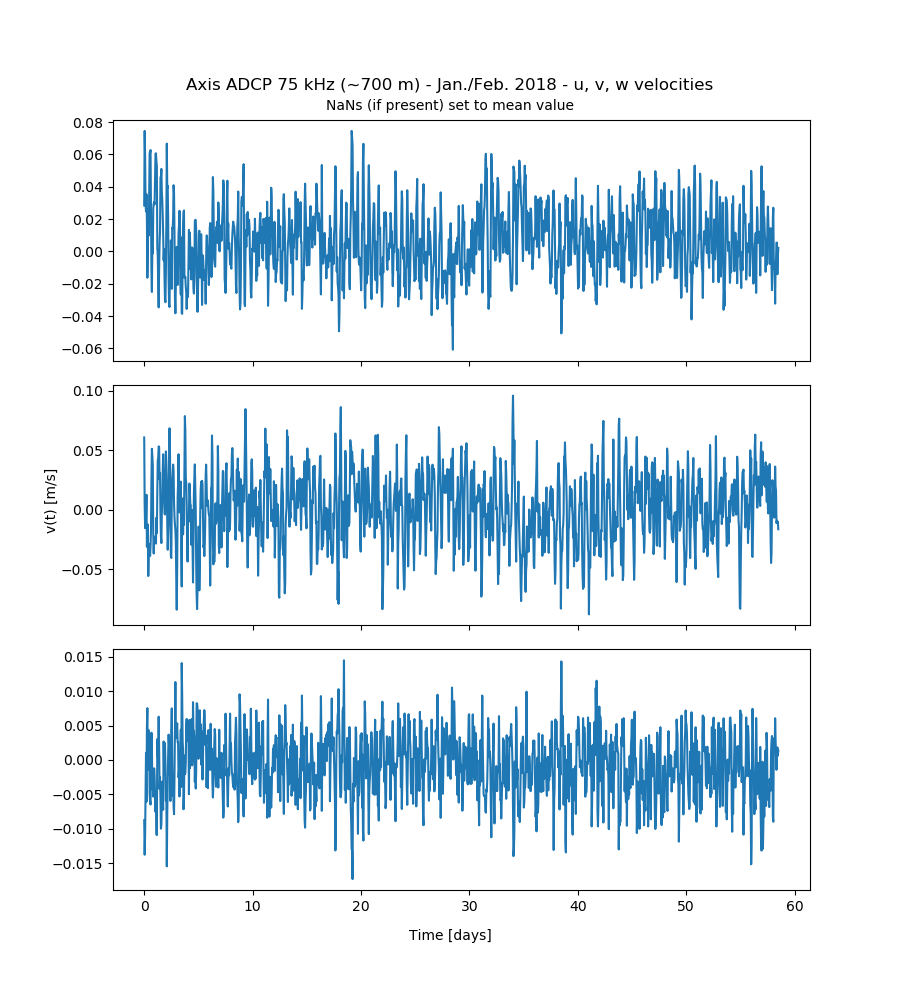

In [146]:
# single depth (700 m) plot time series

fig, (ax1,ax2,ax3) = plt.subplots(3, 1, figsize=(9,10), sharex = True)
fig.subplots_adjust(hspace = 0.1)
fig.text(0.5, 0.91, 'Axis ADCP 75 kHz (~700 m) - Jan./Feb. 2018 - u, v, w velocities', ha='center', fontsize=12)
fig.text(0.5, 0.89, 'NaNs (if present) set to mean value', ha='center', fontsize=10)
fig.text(0.05, 0.5, 'v(t) [m/s]', va='center', rotation='vertical')
fig.text(0.5, 0.06, 'Time [days]', ha='center')

ax1.plot(np.linspace(0,58.5,1404), u700)
ax2.plot(np.linspace(0,58.5,1404), v700)
ax3.plot(np.linspace(0,58.5,1404), w700)
plt.show()

In [147]:
# single depth (700 m) remove mean from time series

u700m = u700 - u700_mean            
v700m = v700 - v700_mean              
w700m = w700 - w700_mean               

<IPython.core.display.Javascript object>


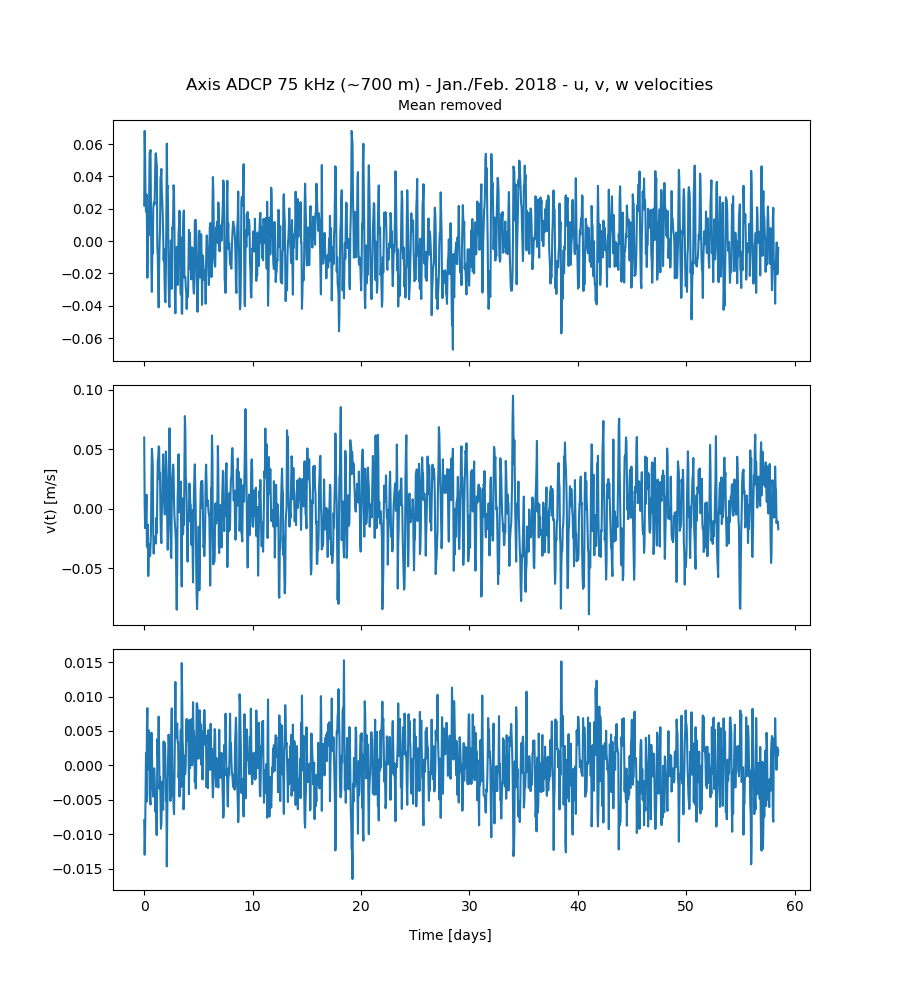

In [148]:
# single depth (700 m) plots w/ removed mean

fig, (ax1,ax2,ax3) = plt.subplots(3, 1, figsize=(9,10), sharex = True)
fig.subplots_adjust(hspace = 0.1)
fig.text(0.5, 0.91, 'Axis ADCP 75 kHz (~700 m) - Jan./Feb. 2018 - u, v, w velocities', ha='center', fontsize=12)
fig.text(0.5, 0.89, 'Mean removed', ha='center', fontsize=10)
fig.text(0.05, 0.5, 'v(t) [m/s]', va='center', rotation='vertical')
fig.text(0.5, 0.06, 'Time [days]', ha='center')

ax1.plot(np.linspace(0,58.5,1404), u700m)
ax2.plot(np.linspace(0,58.5,1404), v700m)
ax3.plot(np.linspace(0,58.5,1404), w700m)
plt.show()

<IPython.core.display.Javascript object>


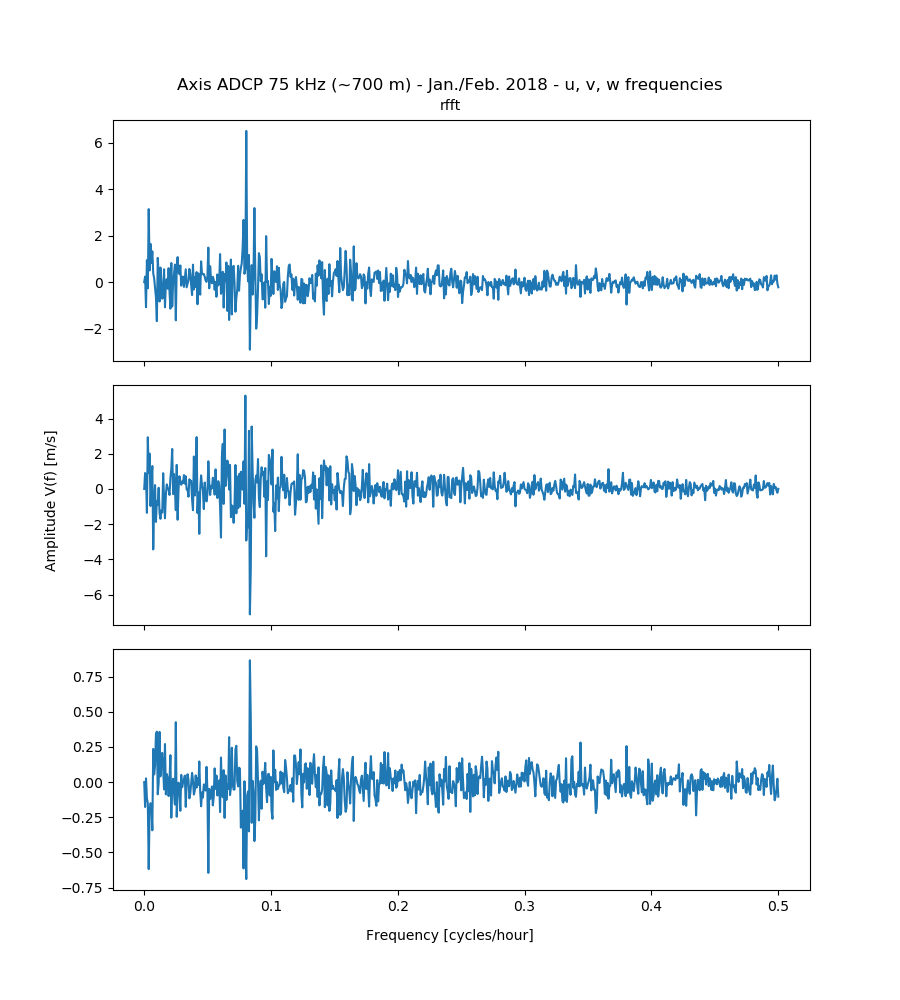

In [150]:
# 1D single depth (700 m) normalised RFFT

ufft = np.fft.rfft(u700m)
ufreq = np.fft.rfftfreq(u700m.shape[0])
vfft = np.fft.rfft(v700m)
vfreq = np.fft.rfftfreq(v700m.shape[0])
wfft = np.fft.rfft(w700m)
wfreq = np.fft.rfftfreq(w700m.shape[0])

fig, (ax1,ax2,ax3) = plt.subplots(3, 1, figsize=(9,10), sharex = True)
fig.subplots_adjust(hspace = 0.1)
fig.text(0.5, 0.91, 'Axis ADCP 75 kHz (~700 m) - Jan./Feb. 2018 - u, v, w frequencies', ha='center', fontsize=12)
fig.text(0.5, 0.89, 'rfft', ha='center', fontsize=10)
fig.text(0.05, 0.5, 'Amplitude V(f) [m/s]', va='center', rotation='vertical')
fig.text(0.5, 0.06, 'Frequency [cycles/hour]', ha='center')

ax1.plot(ufreq, ufft)
ax2.plot(vfreq, vfft)
ax3.plot(wfreq, wfft)
plt.show()

<IPython.core.display.Javascript object>


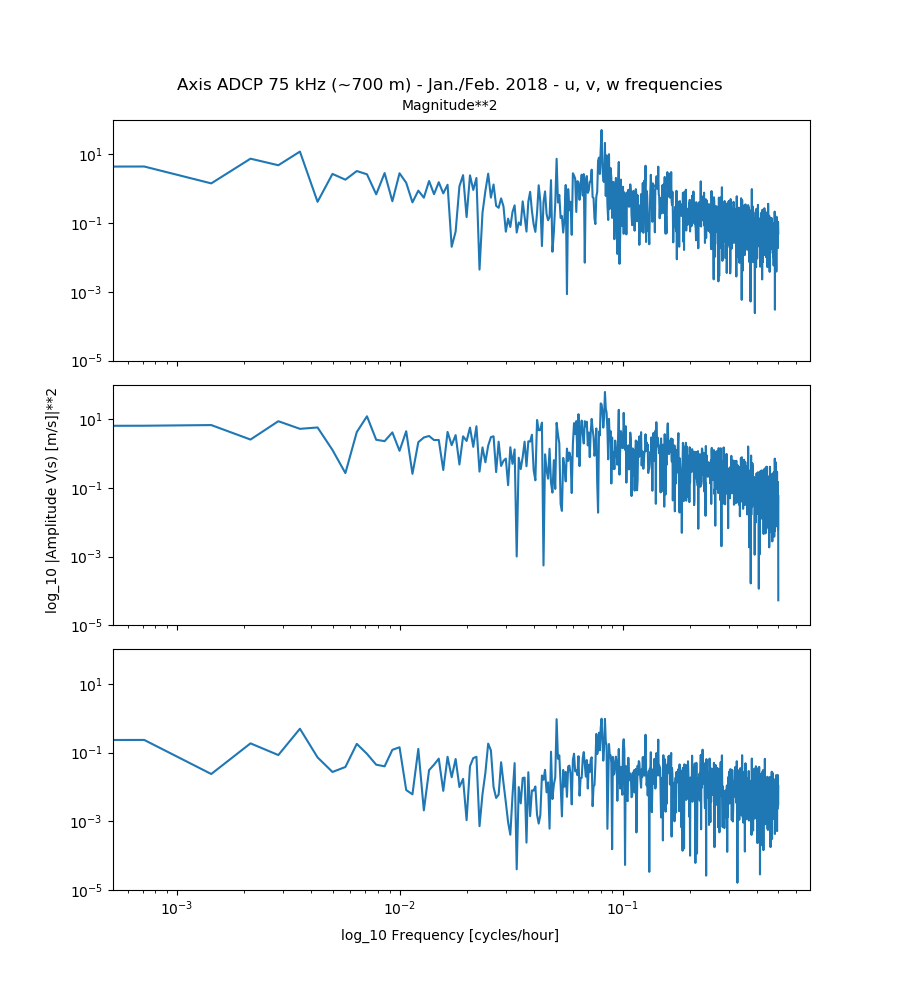

In [191]:
# 1D single depth (700 m) RFFT, magnitude squared

ufft_2 = abs(ufft)**2
vfft_2 = abs(vfft)**2
wfft_2 = abs(wfft)**2

fig, (ax1,ax2,ax3) = plt.subplots(3, 1, figsize=(9,10), sharex = True, sharey = True)
fig.subplots_adjust(hspace = 0.1)
fig.text(0.5, 0.91, 'Axis ADCP 75 kHz (~700 m) - Jan./Feb. 2018 - u, v, w frequencies', ha='center', fontsize=12)
fig.text(0.5, 0.89, 'Magnitude**2', ha='center', fontsize=10)
fig.text(0.05, 0.5, 'log_10 |Amplitude V(s) [m/s]|**2', va='center', rotation='vertical')
fig.text(0.5, 0.06, 'log_10 Frequency [cycles/hour]', ha='center')

ax1.set(ylim=(10e-6, 10e1))
ax1.loglog(ufreq, ufft_2)
ax2.loglog(vfreq, vfft_2)
ax3.loglog(wfreq, wfft_2)
plt.show()

<IPython.core.display.Javascript object>


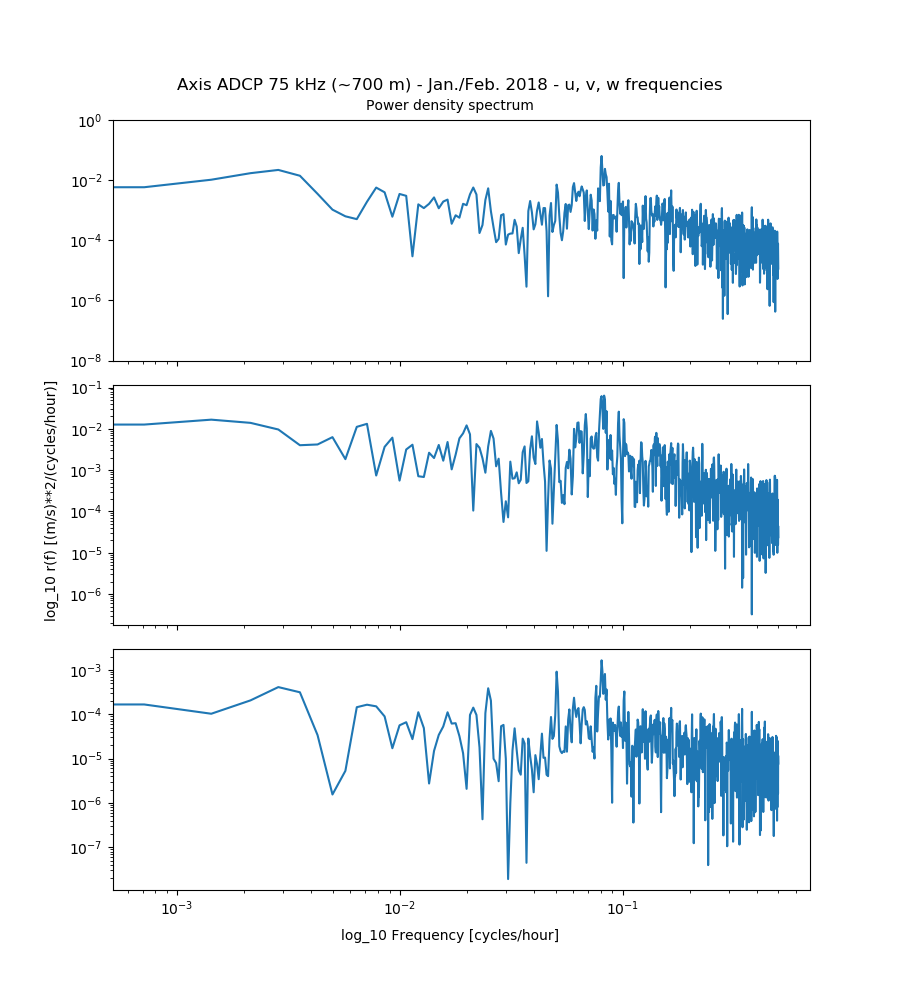

In [189]:
# PDS of single depth (400 m) time series, looks similar (except normalised and squared)

U700f, U700pds = sig.periodogram(u700m, window='hann')
V700f, V700pds = sig.periodogram(v700m, window='hann')
W700f, W700pds = sig.periodogram(w700m, window='hann')

fig, (ax1,ax2,ax3) = plt.subplots(3, 1, figsize=(9,10), sharex = True)
fig.subplots_adjust(hspace = 0.1)
fig.text(0.5, 0.91, 'Axis ADCP 75 kHz (~700 m) - Jan./Feb. 2018 - u, v, w frequencies', ha='center', fontsize=12)
fig.text(0.5, 0.89, 'Power density spectrum', ha='center', fontsize=10)
fig.text(0.05, 0.5, 'log_10 r(f) [(m/s)**2/(cycles/hour)]', va='center', rotation='vertical')
fig.text(0.5, 0.06, 'log_10 Frequency [cycles/hour]', ha='center')

ax1.set(ylim=(10e-9, 10e-1))
ax1.loglog(U700f,U700pds)
ax2.loglog(V700f,V700pds)
ax3.loglog(W700f,W700pds)
plt.show()

# 'zero' frequency could be due to NaN set to mean values
# should interpolate
# higher frequencies should be a mixture of K1, f, M2, fM2(?), M4

In [153]:
# low pass Butterworth filter for 30 hours to remove tides

fs = 1                # 1 sample per hour for entire time series
fc = 0.033            # 30 hour low pass filter
Wn = fc / (fs / 2)    # normalised cut-off frequencies
b, a = sig.butter(12, Wn, 'lowpass')  # digital butterworth filter
w, h = sig.freqz(b, a, fs = 1)

u700m30 = sig.filtfilt(b, a, u700m)
v700m30 = sig.filtfilt(b, a, v700m)
w700m30 = sig.filtfilt(b, a, w700m)

<IPython.core.display.Javascript object>


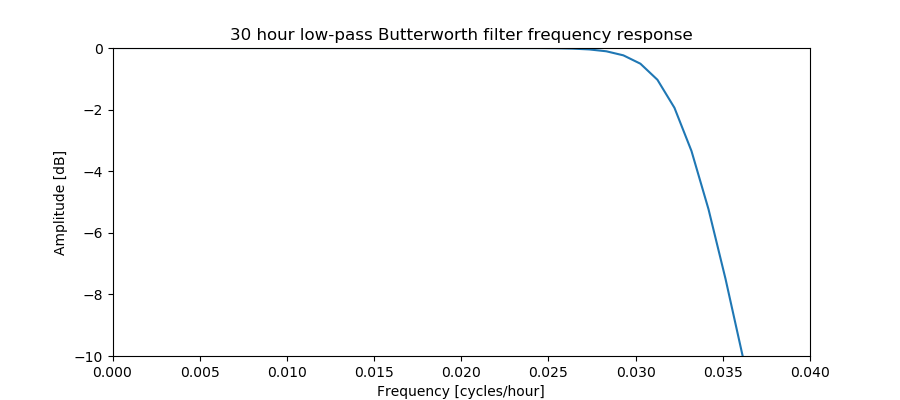

In [154]:
# check filter response

plt.figure(figsize=(9,4))
#plt.plot(fs/2*w, abs(h))
plt.plot(w, 20 * np.log10(abs(h)))
plt.xlim(0,0.04)
plt.ylim(-10,0)
plt.xlabel("Frequency [cycles/hour]")
plt.ylabel("Amplitude [dB]")
plt.title("30 hour low-pass Butterworth filter frequency response")
plt.show()

<IPython.core.display.Javascript object>


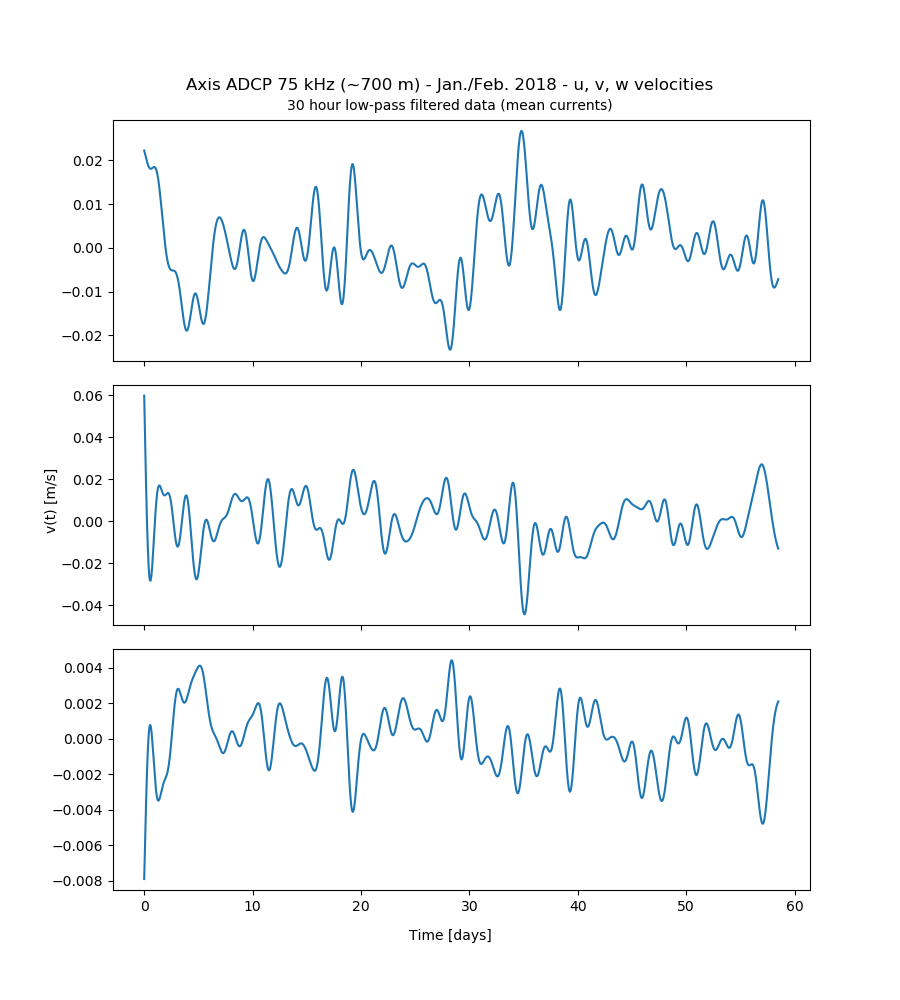

In [156]:
# single depth (700 m) plots w/ removed tides (30 hr low pass filter)

fig, (ax1,ax2,ax3) = plt.subplots(3, 1, figsize=(9,10), sharex = True)
fig.subplots_adjust(hspace = 0.1)
fig.text(0.5, 0.91, 'Axis ADCP 75 kHz (~700 m) - Jan./Feb. 2018 - u, v, w velocities', ha='center', fontsize=12)
fig.text(0.5, 0.89, '30 hour low-pass filtered data (mean currents)', ha='center', fontsize=10)
fig.text(0.05, 0.5, 'v(t) [m/s]', va='center', rotation='vertical')
fig.text(0.5, 0.06, 'Time [days]', ha='center')

ax1.plot(np.linspace(0,58.5,1404), u700m30)
ax2.plot(np.linspace(0,58.5,1404), v700m30)
ax3.plot(np.linspace(0,58.5,1404), w700m30)
plt.show()

<IPython.core.display.Javascript object>


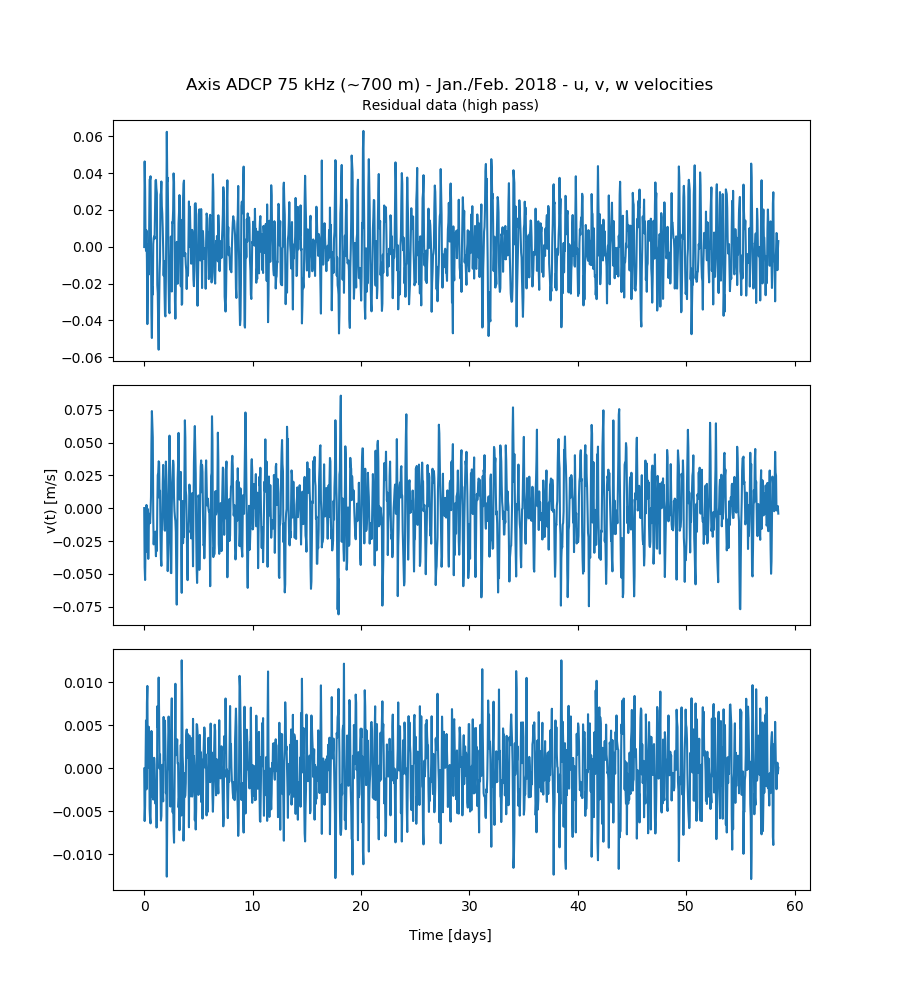

In [157]:
# high-pass data from (original - filtered; tides and coriolis)

u700mhp = u700m - u700m30
v700mhp = v700m - v700m30
w700mhp = w700m - w700m30

fig, (ax1,ax2,ax3) = plt.subplots(3, 1, figsize=(9,10), sharex = True)
fig.subplots_adjust(hspace = 0.1)
fig.text(0.5, 0.91, 'Axis ADCP 75 kHz (~700 m) - Jan./Feb. 2018 - u, v, w velocities', ha='center', fontsize=12)
fig.text(0.5, 0.89, 'Residual data (high pass)', ha='center', fontsize=10)
fig.text(0.05, 0.5, 'v(t) [m/s]', va='center', rotation='vertical')
fig.text(0.5, 0.06, 'Time [days]', ha='center')

ax1.plot(np.linspace(0,58.5,1404), u700mhp)
ax2.plot(np.linspace(0,58.5,1404), v700mhp)
ax3.plot(np.linspace(0,58.5,1404), w700mhp)
plt.show()

<IPython.core.display.Javascript object>


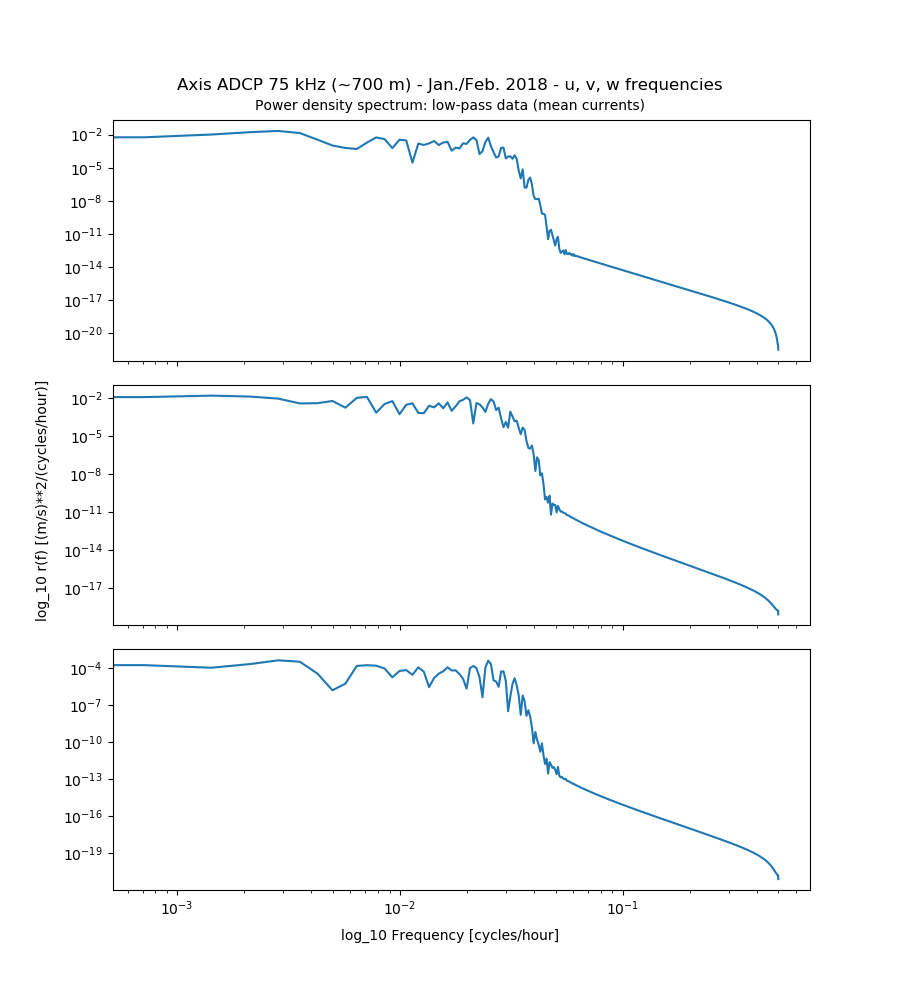

In [192]:
# PDS of low-pass time series

U700m30f, U700m30pds = sig.periodogram(u700m30, window='hann')
V700m30f, V700m30pds = sig.periodogram(v700m30, window='hann')
W700m30f, W700m30pds = sig.periodogram(w700m30, window='hann')

fig, (ax1,ax2,ax3) = plt.subplots(3, 1, figsize=(9,10), sharex = True)
fig.subplots_adjust(hspace = 0.1)
fig.text(0.5, 0.91, 'Axis ADCP 75 kHz (~700 m) - Jan./Feb. 2018 - u, v, w frequencies', ha='center', fontsize=12)
fig.text(0.5, 0.89, 'Power density spectrum: low-pass data (mean currents)', ha='center', fontsize=10)
fig.text(0.04, 0.5, 'log_10 r(f) [(m/s)**2/(cycles/hour)]', va='center', rotation='vertical')
fig.text(0.5, 0.06, 'log_10 Frequency [cycles/hour]', ha='center')

ax1.loglog(U700m30f,U700m30pds)
ax2.loglog(V700m30f,V700m30pds)
ax3.loglog(W700m30f,W700m30pds)
plt.show()

<IPython.core.display.Javascript object>


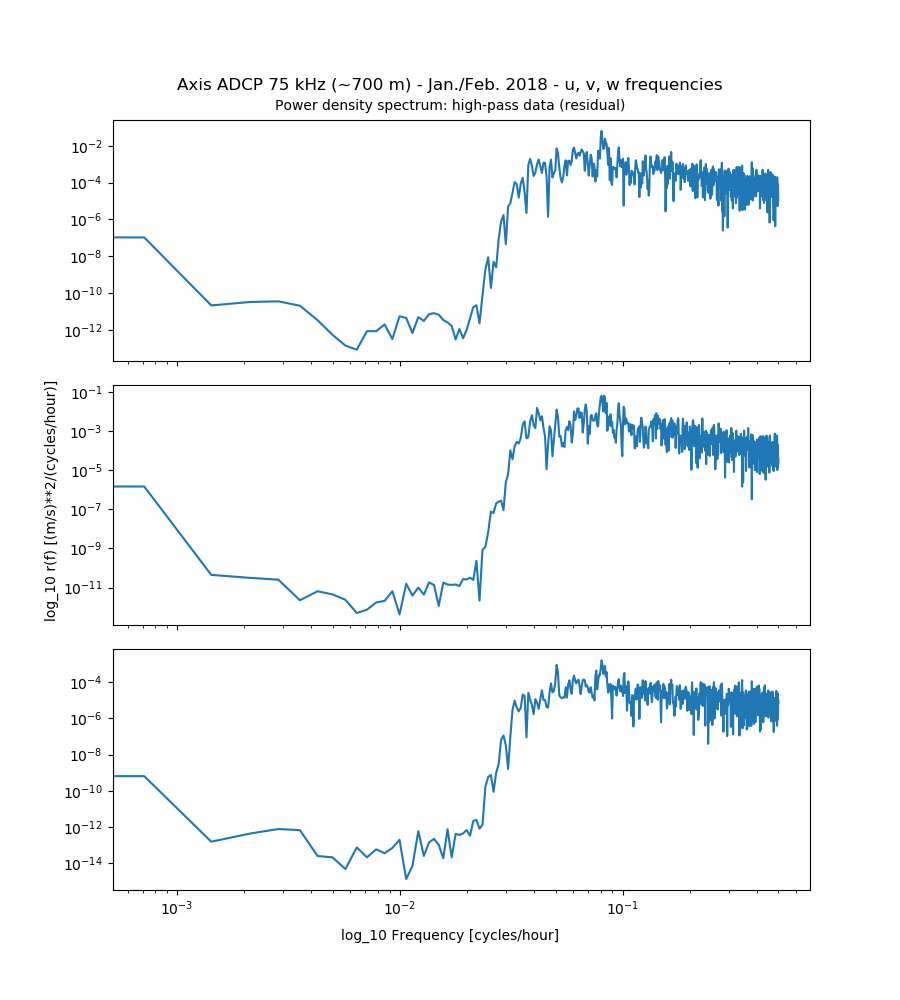

In [194]:
# PDS of high-pass time series (residual - tides and coriolis)

U700mhpf, U700mhppds = sig.periodogram(u700mhp, window='hann')
V700mhpf, V700mhppds = sig.periodogram(v700mhp, window='hann')
W700mhpf, W700mhppds = sig.periodogram(w700mhp, window='hann')

fig, (ax1,ax2,ax3) = plt.subplots(3, 1, figsize=(9,10), sharex = True)
fig.subplots_adjust(hspace = 0.1)
fig.text(0.5, 0.91, 'Axis ADCP 75 kHz (~700 m) - Jan./Feb. 2018 - u, v, w frequencies', ha='center', fontsize=12)
fig.text(0.5, 0.89, 'Power density spectrum: high-pass data (residual)', ha='center', fontsize=10)
fig.text(0.05, 0.5, 'log_10 r(f) [(m/s)**2/(cycles/hour)]', va='center', rotation='vertical')
fig.text(0.5, 0.06, 'log_10 Frequency [cycles/hour]', ha='center')

ax1.loglog(U700mhpf,U700mhppds)
ax2.loglog(V700mhpf,V700mhppds)
ax3.loglog(W700mhpf,W700mhppds)
plt.show()